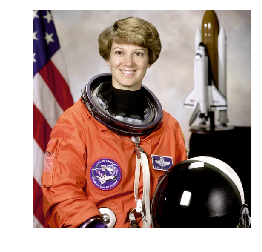

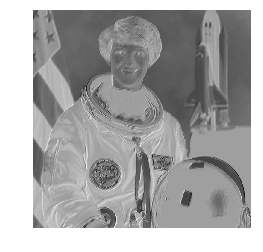

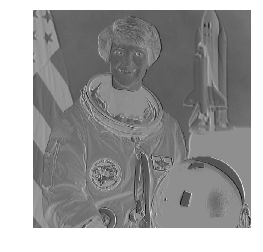

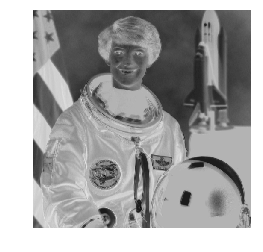

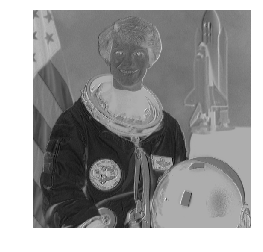

In [4]:
import numpy  
import theano  
import matplotlib.pyplot as plt 
import theano.tensor as T
from theano.tensor.nnet import conv2d
import skimage.data

import matplotlib.cm as cm

depth = 4
filter_shape = (3, 3) 
   
input = T.tensor4(name='input')  
   
w_shape = (depth, 3, filter_shape[0], filter_shape[1]) 
dist = numpy.random.uniform(-0.2, 0.2, size=w_shape)
W = theano.shared(numpy.asarray(dist, dtype=input.dtype), name = 'W')                             
conv_output = conv2d(input, W)   
output = T.nnet.sigmoid(conv_output)
f = theano.function([input], output)

astronaut = skimage.data.astronaut()
img = numpy.asarray(astronaut, dtype='float32') / 255
filtered_img = f(img.transpose(2, 0, 1).reshape(1, 3, 512, 512))


plt.axis('off') 
plt.imshow(img) 
plt.show()  
for img in range(depth):
  fig = plt.figure()   
  plt.axis( 'off')   
  plt.imshow(filtered_img[0, img, :, :, ], cmap = cm.gray)
  plt.show()

  filename = "astro" + str(img)
  fig.savefig(filename, bbox_inches='tight')
  
